# Sobre os Conjuntos de Dados
- O conjunto de dados, é referente aos dados pessoais de custo médico. Os dados contém o sexo do contratante homem ou mulher, idade, dependentes, BMI, se os pacientes são fumantes ou não, a região e os custos médicos. Farei uma EDA, e depois farei os modelos para a previsão de seguro.

# Importando bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from math import sqrt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, mean_squared_error

# Carregando os Dados

In [2]:
dados = pd.read_csv('/content/insurance.csv')

## Informações dos Dados

In [3]:
# visualizando as primeiras cinco linhas
dados.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
# criando uma tabela com as informações dos dados
print('Tamanho dos Dados:',dados.shape)
print('Dados Duplicados:',dados.duplicated().sum())
tabela = pd.DataFrame({
    'Unique':dados.nunique(),
    'Null':dados.isna().sum(),
    'Types':dados.dtypes.values
})
tabela

Tamanho dos Dados: (1338, 7)
Dados Duplicados: 1


,Unique,Null,Types
age,47,0,int64
sex,2,0,object
bmi,548,0,float64
children,6,0,int64
smoker,2,0,object
region,4,0,object
charges,1337,0,float64


# Gráficos

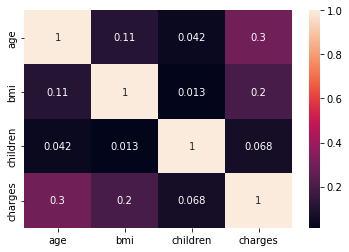

In [ ]:
sns.heatmap(dados.corr(method='pearson'), annot=True)

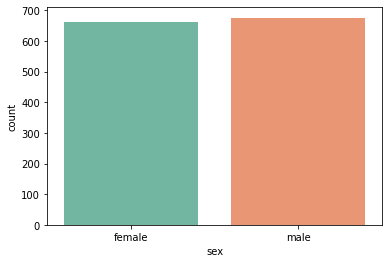

In [ ]:
# gênero
sns.countplot(x=dados['sex'], palette='Set2')

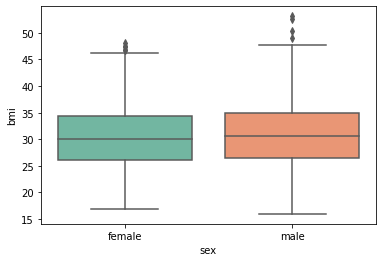

In [ ]:
# BMI POR GÊNERO
sns.boxplot(x=dados['sex'], y=dados['bmi'], palette='Set2')

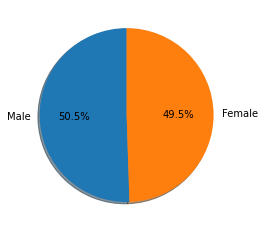

In [ ]:
valor = dados['sex'].value_counts()
nomes = ['Male','Female']
explode = (0,0)
plt.pie(valor, labels=nomes, explode=explode, autopct='%1.1f%%', shadow=True, startangle=90)
plt.show()

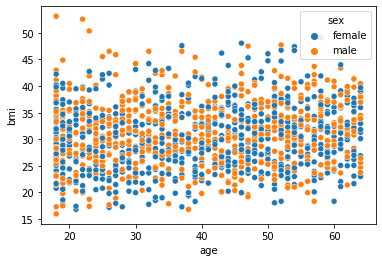

In [ ]:
# IBM é a causa da idade por gênero
sns.scatterplot(x=dados['age'], y=dados['bmi'], hue=dados['sex'])

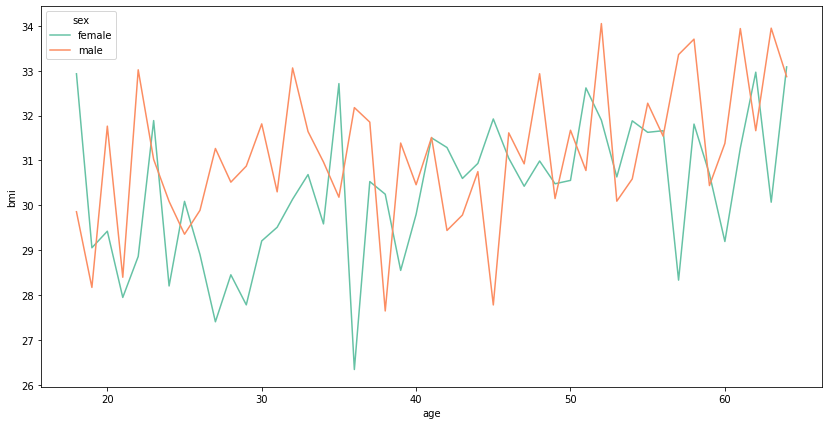

In [ ]:
plt.figure(figsize=(14,7))
sns.lineplot(x=dados['age'], y=dados['bmi'], hue=dados['sex'], ci=None, palette='Set2')

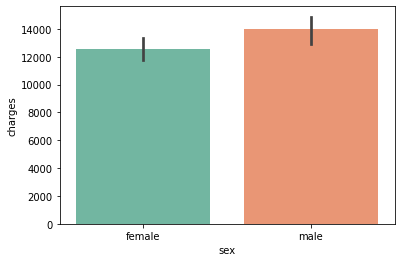

In [ ]:
# mulheres são propensas a ter seguro mais alto do que os homens
sns.barplot(x=dados['sex'], y=dados['charges'],palette='Set2')

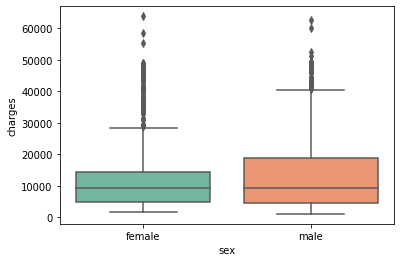

In [ ]:
sns.boxplot(x=dados['sex'], y=dados['charges'], palette='Set2')

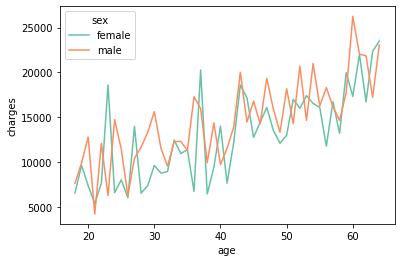

In [ ]:
## pessoas com mais idade são propensas a ter seguro alto
sns.lineplot(x=dados['age'], y=dados['charges'], hue=dados['sex'], ci=None, palette='Set2')

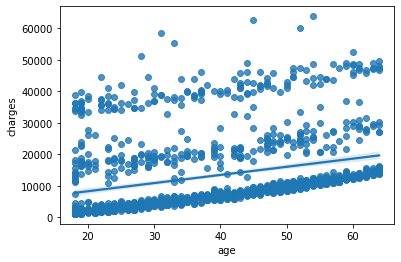

In [ ]:
sns.regplot(x=dados['age'], y=dados['charges'])

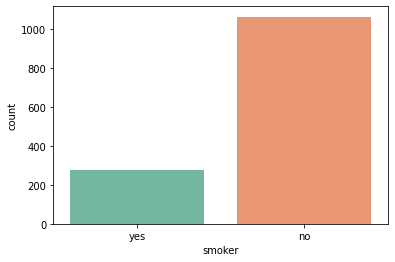

In [ ]:
# homens fumam mais que as mulheres?
sns.countplot(x=dados['smoker'],palette='Set2')

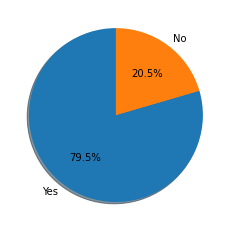

In [ ]:
valor = dados['smoker'].value_counts()
nome = ['Yes','No']
explode=(0,0)
plt.pie(valor, labels=nome, explode=explode,autopct='%1.1f%%',shadow=True, startangle=90)
plt.show()

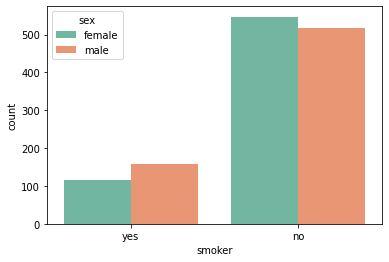

In [ ]:
sns.countplot(x=dados['smoker'], hue=dados['sex'],palette='Set2')

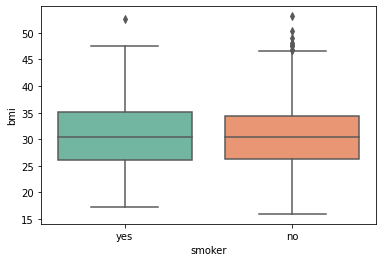

In [ ]:
# pessoas que fumam tem bmi alto
sns.boxplot(x=dados['smoker'], y=dados['bmi'], palette='Set2')

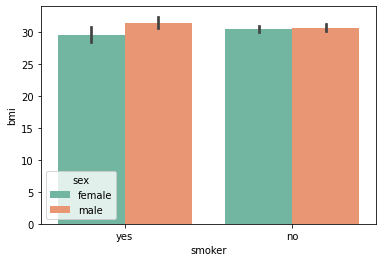

In [ ]:
sns.barplot(x=dados['smoker'], y =dados['bmi'], hue=dados['sex'], palette='Set2')

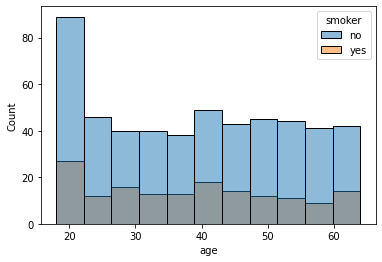

In [ ]:
## homens que fumam são maiores de 40 anos
sns.histplot(x='age', hue='smoker',data = dados[dados['sex'] == 'male'])

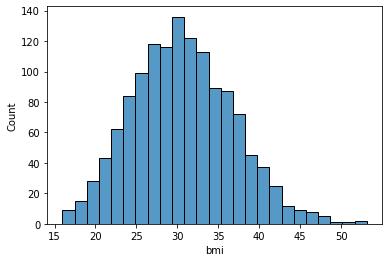

In [ ]:
sns.histplot(x=dados['bmi'])

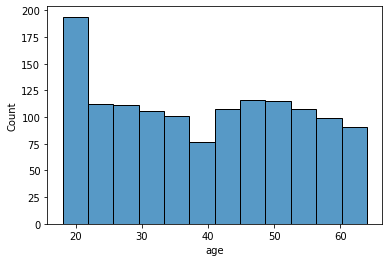

In [ ]:
sns.histplot(dados['age'])

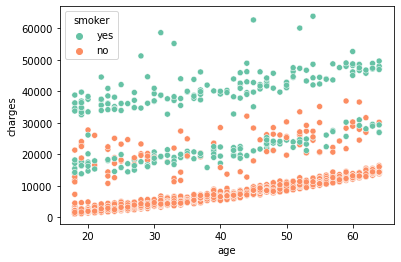

In [ ]:
sns.scatterplot(x=dados['age'], y=dados['charges'], hue=dados['smoker'], palette='Set2')

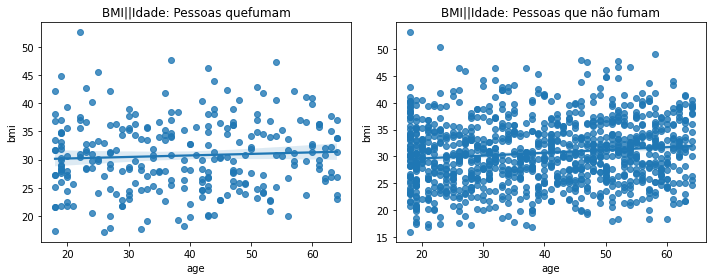

In [ ]:
# a idade das pessoas que fumam tem bmi alto
fig, axes = plt.subplots(1,2,figsize=(10,4))
sns.regplot(x='age', y='bmi', data = dados[dados['smoker'] == 'yes'], ax=axes[0])
axes[0].set_title('BMI||Idade: Pessoas quefumam')

sns.regplot(x='age', y='bmi', data = dados[dados['smoker'] == 'no'], ax=axes[1])
axes[1].set_title('BMI||Idade: Pessoas que não fumam')

plt.tight_layout()
plt.show()

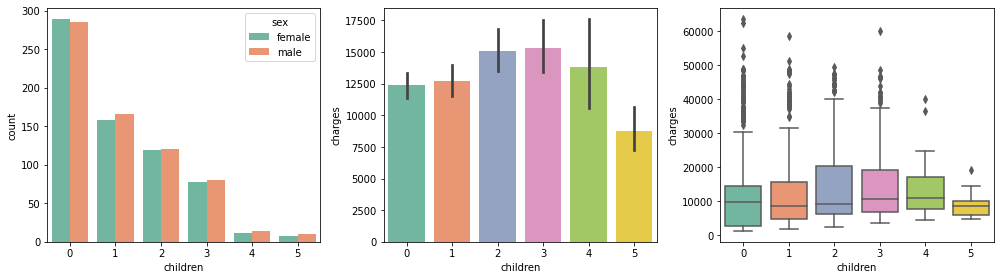

In [ ]:
fig, axes = plt.subplots(1,3,figsize=(14,4))
sns.countplot(x=dados['children'], hue=dados['sex'], ax=axes[0],palette='Set2')
sns.barplot(x=dados['children'], y=dados['charges'],ax=axes[1], palette='Set2')
sns.boxplot(x=dados['children'], y=dados['charges'], ax=axes[2], palette='Set2')
plt.tight_layout()
plt.show()

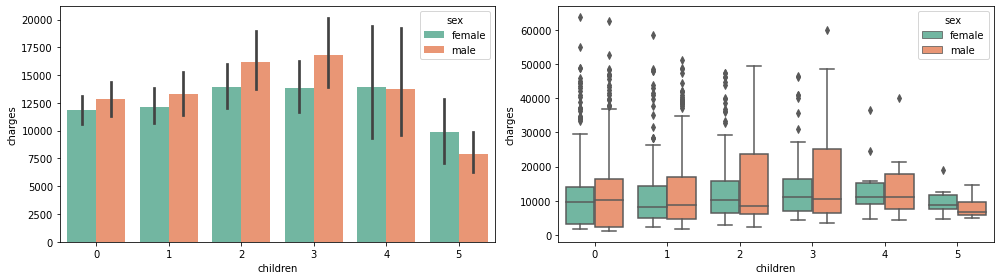

In [ ]:
fig, axes = plt.subplots(1,2,figsize=(14,4))
sns.barplot(x=dados['children'], y=dados['charges'],hue=dados['sex'],ax=axes[0],palette='Set2')
sns.boxplot(x=dados['children'], y=dados['charges'], hue=dados['sex'], ax=axes[1],palette='Set2')
plt.tight_layout()
plt.show()

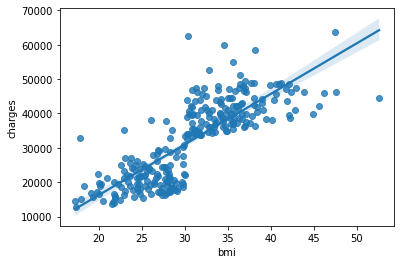

In [ ]:
# seguro são mais propensos as pessoas que fumam e tem bmi alto?
sns.regplot(x='bmi', y='charges', data = dados[dados['smoker'] == 'yes'])

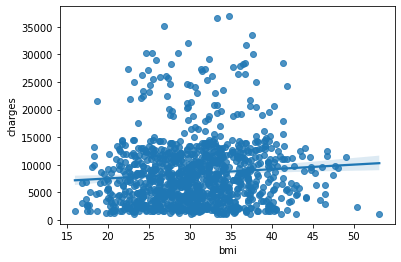

In [ ]:
# Pessoas que não fumam também tem o seguro alto?
sns.regplot(x='bmi', y='charges', data = dados[dados['smoker'] == 'no'])

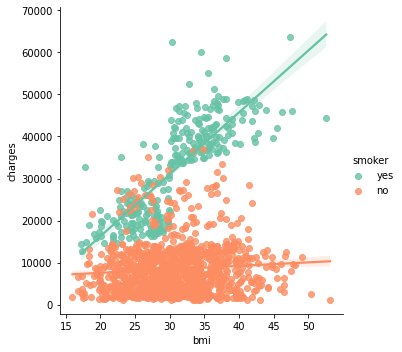

In [ ]:
sns.lmplot(x='bmi', y='charges', hue='smoker', data=dados, palette='Set2')
plt.show()

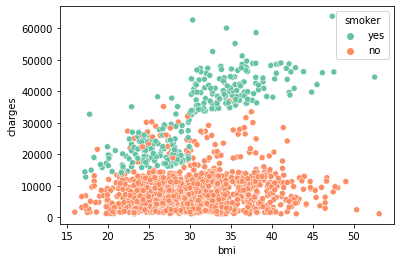

In [ ]:
sns.scatterplot(x='bmi', y='charges', hue='smoker', data=dados, palette='Set2')

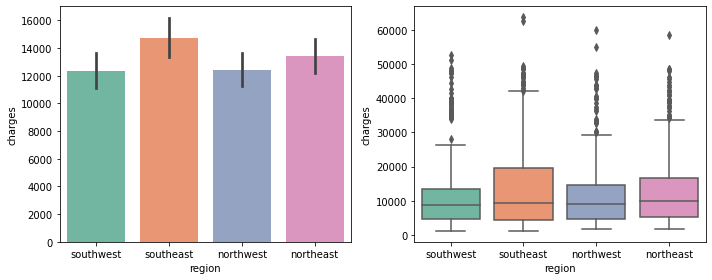

In [ ]:
# qual região com mais seguro
fig, axes = plt.subplots(1,2, figsize=(10,4))
sns.barplot(x=dados['region'], y=dados['charges'], ax=axes[0], palette='Set2')
sns.boxplot(x=dados['region'], y=dados['charges'], ax=axes[1], palette='Set2')
plt.tight_layout()
plt.show()

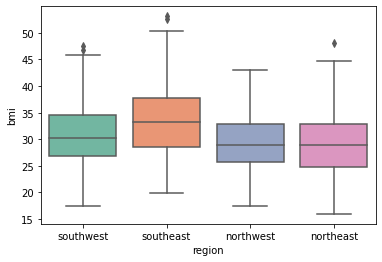

In [ ]:
# qual a região com mais indice de bmi
sns.boxplot(x=dados['region'],y=dados['bmi'],palette='Set2')

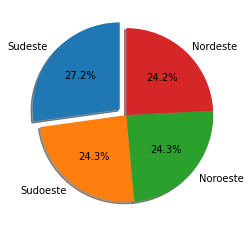

In [ ]:
valor = dados['region'].value_counts()
nome = ['Sudeste','Sudoeste','Noroeste','Nordeste']
explode = (0.1,0,0,0)
plt.pie(valor, labels=nome, explode=explode, autopct='%1.1f%%', shadow=True, startangle=90)
plt.show()

In [ ]:
# qual a região com mais indice de fumo

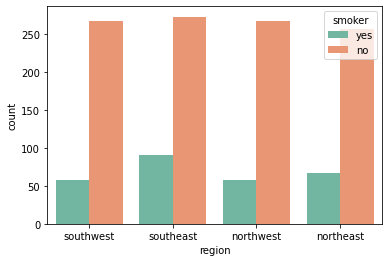

In [ ]:
sns.countplot(x=dados['region'], hue=dados['smoker'], palette='Set2')


# Transformando os Dados

In [5]:
dados.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
dados.drop_duplicates(inplace=True)
df = dados.copy()

In [7]:
df.replace({'female':1, 'male':0, 'yes':1, 'no':0}, inplace=True)

In [8]:
cat = df.select_dtypes(include='O')

df = pd.get_dummies(df, columns=[col for col in df.columns if col in cat])

df.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,16884.92400,0,0,0,1
1,18,0,33.770,1,0,1725.55230,0,0,1,0
2,28,0,33.000,3,0,4449.46200,0,0,1,0
3,33,0,22.705,0,0,21984.47061,0,1,0,0
4,32,0,28.880,0,0,3866.85520,0,1,0,0


# Avaliação dos Modelos

## Linear Regression

In [ ]:
y = df.charges.astype(int)
x = df.drop('charges',axis=1)

xtrain, xtest, ytrain,ytest = train_test_split(x,y,test_size=0.2, random_state=42)

In [ ]:
lr = LinearRegression()

lr.fit(xtrain, ytrain)

y_pred = lr.predict(xtrain)

lr.score(xtest, ytest)

0.8069277297147446

In [ ]:
print('Acúracia do Treino:', lr.score(xtrain, ytrain))
print('Acúracia do R2 score precisão do treino:', r2_score(ytrain, y_pred))
print()
print('Acúracia do Teste:', lr.score(xtest, ytest))
print()
print('RSME do Treino:', sqrt(mean_squared_error(ytrain, y_pred))) # erro quadratico é de 6.081 dolares
print('RSME de Teste:', sqrt(mean_squared_error(ytest, lr.predict(xtest)))) # erro quadratico é de 5.956 dolares
print()
print('MAE do Treino:', mean_squared_error(ytrain, y_pred))
print('MAE de Teste:', mean_squared_error(ytest, lr.predict(xtest)))

Acúracia do Treino: 0.7299056346936018
Acúracia do R2 score precisão do treino: 0.7299056346936018

Acúracia do Teste: 0.8069277297147446

RSME do Treino: 6081.109493266427
RSME de Teste: 5956.358327918306

MAE do Treino: 36979892.66909506
MAE de Teste: 35478204.53056176


## Random Forest

In [ ]:
y = df.charges.astype(int)
x = df.drop('charges',axis=1)

xtrain, xtest, ytrain,ytest = train_test_split(x,y,test_size=0.2, random_state=42)

In [ ]:
# sem otimização
forest = RandomForestRegressor(random_state=42)
forest.fit(xtrain,ytrain)
y_pred = forest.predict(xtrain)
forest.score(xtest, ytest)

0.8822545142659028

In [ ]:
print('Acúracia do Treino:', forest.score(xtrain, ytrain))
print('Acúracia do R2 score precisão do treino:', r2_score(ytrain, y_pred))
print()
print('Acúracia do Teste:', forest.score(xtest, ytest))
print()
print('RSME do Treino:', sqrt(mean_squared_error(ytrain, y_pred))) # erro quadratico é de 6.081 dolares
print('RSME de Teste:', sqrt(mean_squared_error(ytest, forest.predict(xtest)))) # erro quadratico é de 5.956 dolares
print()
print('MAE do Treino:', mean_squared_error(ytrain, y_pred))
print('MAE de Teste:', mean_squared_error(ytest, forest.predict(xtest)))

Acúracia do Treino: 0.9742523437571884
Acúracia do R2 score precisão do treino: 0.9742523437571884

Acúracia do Teste: 0.8822545142659028

RSME do Treino: 1877.5603799036176
RSME de Teste: 4651.499704144417

MAE do Treino: 3525232.980183817
MAE de Teste: 21636449.497655597


### Otimizando o Random Forest

In [ ]:
forest = RandomForestRegressor(random_state=42)

params = {
    'max_depth':[5,10,20,30],
    'max_features':[2,3,4],
    'n_estimators':[50,70,90,100,200,300]
}

grid_search = GridSearchCV(estimator= forest, param_grid= params, cv=5, n_jobs=-1)

grid_search.fit(xtrain, ytrain)

grid_search.best_params_

{'max_depth': 10, 'max_features': 4, 'n_estimators': 200}

In [ ]:
forest = RandomForestRegressor(max_depth=5, max_features=3, n_estimators=300,random_state=42)
forest.fit(xtrain,ytrain)
y_pred = forest.predict(xtrain)
forest.score(xtest, ytest)

0.8464870103085678

In [ ]:
print('Acúracia do Treino:', forest.score(xtrain, ytrain))
print('Acúracia do R2 score precisão do treino:', r2_score(ytrain, y_pred))
print()
print('Acúracia do Teste:', forest.score(xtest, ytest))
print()
print('RSME do Treino:', sqrt(mean_squared_error(ytrain, y_pred))) # erro quadratico é de 6.081 dolares
print('RSME de Teste:', sqrt(mean_squared_error(ytest, forest.predict(xtest)))) # erro quadratico é de 5.956 dolares
print()
print('MAE do Treino:', mean_squared_error(ytrain, y_pred))
print('MAE de Teste:', mean_squared_error(ytest, forest.predict(xtest)))

Acúracia do Treino: 0.8404841894747676
Acúracia do R2 score precisão do treino: 0.8404841894747676

Acúracia do Teste: 0.8464870103085678

RSME do Treino: 4673.335159355522
RSME de Teste: 5311.209466679494

MAE do Treino: 21840061.511668503
MAE de Teste: 28208945.998945877


## Gradient

In [9]:
y = df.charges.astype(int)
x = df.drop('charges',axis=1)

xtrain, xtest, ytrain,ytest = train_test_split(x,y,test_size=0.2, random_state=42)

In [10]:
# sem otimização
grade = GradientBoostingRegressor(random_state=42)
grade.fit(xtrain, ytrain)

y_pred = grade.predict(xtrain)
y_pred_g = grade.predict(xtest)

In [11]:
print(grade.score(xtrain,ytrain))
print(grade.score(xtest, ytest))

0.893225912219889
0.9004993688845984


In [12]:
print('Acúracia do Treino:', grade.score(xtrain, ytrain))
print('Acúracia do R2 score precisão do treino:', r2_score(ytrain, y_pred))
print()
print('Acúracia do Teste:', grade.score(xtest, ytest))
print()
print('RSME do Treino:', sqrt(mean_squared_error(ytrain, y_pred)))
print('RSME de Teste:', sqrt(mean_squared_error(ytest, grade.predict(xtest))))
print()
print('MAE do Treino:', mean_squared_error(ytrain, y_pred))
print('MAE de Teste:', mean_squared_error(ytest, grade.predict(xtest)))

Acúracia do Treino: 0.893225912219889
Acúracia do R2 score precisão do treino: 0.893225912219889

Acúracia do Teste: 0.9004993688845984

RSME do Treino: 3823.4727209177136
RSME de Teste: 4275.9614637595505

MAE do Treino: 14618943.647601904
MAE de Teste: 18283846.439556714


### Otimizando o Gradient

In [13]:
grade = GradientBoostingRegressor(random_state=42)

params = {
    'max_depth':[5,10,20,30],
    'max_features':[2,3,4],
    'n_estimators':[50,70,90,100,200,300]
}

grid_search = GridSearchCV(estimator= grade, param_grid= params, cv=5, n_jobs=-1)

grid_search.fit(xtrain, ytrain)

grid_search.best_params_

{'max_depth': 5, 'max_features': 4, 'n_estimators': 50}

In [14]:
grade = GradientBoostingRegressor(max_depth=5, max_features=4, n_estimators=50,random_state=42)
grade.fit(xtrain, ytrain)

grade.score(xtest, ytest)

0.8987182878878268

In [15]:
print('Acúracia do Treino:', grade.score(xtrain, ytrain))
print('Acúracia do R2 score precisão do treino:', r2_score(ytrain, y_pred))
print()
print('Acúracia do Teste:', grade.score(xtest, ytest))
print()
print('RSME do Treino:', sqrt(mean_squared_error(ytrain, y_pred))) # erro quadratico é de 6.081 dolares
print('RSME de Teste:', sqrt(mean_squared_error(ytest, grade.predict(xtest)))) # erro quadratico é de 5.956 dolares
print()
print('MAE do Treino:', mean_squared_error(ytrain, y_pred))
print('MAE de Teste:', mean_squared_error(ytest, grade.predict(xtest)))

Acúracia do Treino: 0.910413959950557
Acúracia do R2 score precisão do treino: 0.893225912219889

Acúracia do Teste: 0.8987182878878268

RSME do Treino: 3823.4727209177136
RSME de Teste: 4314.061996631941

MAE do Treino: 14618943.647601904
MAE de Teste: 18611130.910783973


- Tanto o modelo sem a otimização, quanto otimizado obteve a acúracia de 90% dos dados. Este foi o melhor modelo em compração aos outros anteriores, por isso, usarei ele para visualizar no plot e adicioná-lo ao conjunto de dados.

## Visualizando o modelo Gradient

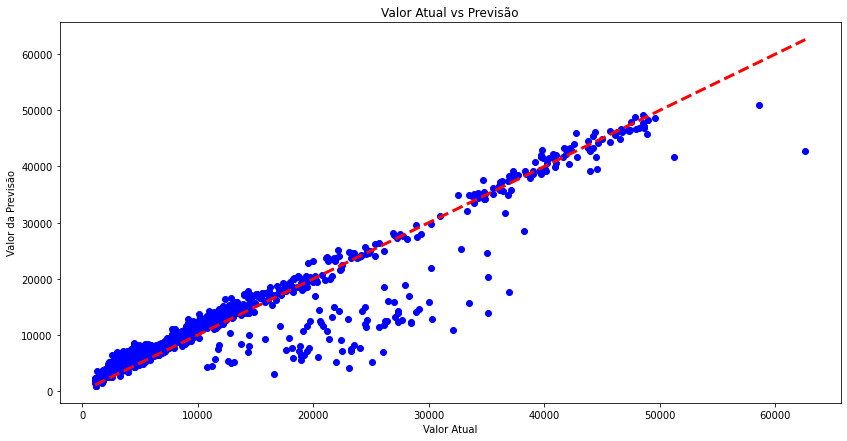

In [16]:
# plotando valores atuais e predição
plt.figure(figsize=(14,7))

plt.scatter(ytrain, y_pred, c='blue')
plt.plot([ytrain.min(), ytrain.max()], [ytrain.min(), ytrain.max()], 'k--', c='red', lw=3)

plt.xlabel('Valor Atual')
plt.ylabel('Valor da Previsão')
plt.title('Valor Atual vs Previsão')

plt.show()

= Devido a pequena quantidade de dados, o valor previsto pelo modelo de regressão previu apenas 90% dos gastos médicos obtidos pelos pacientes.

# DataFrame com valores Preditos

In [ ]:
# criando tabela com o conjunto de treino
new = pd.DataFrame(xtrain, columns=x.columns)
new['charges'] = ytrain.values
new['level'] = 'Dados Existem'
new['Predictions'] = y_pred

# criando tabela com o conjunto de teste
new1 = pd.DataFrame(xtest, columns=x.columns)
new1['charges'] = ytest
new1['level'] = 'Dados Novos'
new1['Predictions'] = y_pred_g

# juntando os novos conjuntos de dados
final = pd.concat([new, new1], ignore_index=True)

print('Original', dados.shape)
print(new.shape)
print(new1.shape)
print('Mesclado',final.shape)

Original (1337, 7)
(1069, 12)
(268, 12)
Mesclado (1337, 12)


In [ ]:
new_data = dados.merge(final[['level','Predictions']], left_index=True, right_index=True)
print(new_data.shape)
print(dados.shape)

(1336, 9)
(1337, 7)


In [ ]:
new_data

,age,sex,bmi,children,smoker,region,charges,level,Predictions
0,19,female,27.900,0,yes,southwest,16884.92400,Dados Existem,4405.446572
1,18,male,33.770,1,no,southeast,1725.55230,Dados Existem,6257.246959
2,28,male,33.000,3,no,southeast,4449.46200,Dados Existem,15727.810992
3,33,male,22.705,0,no,northwest,21984.47061,Dados Existem,15888.569356
4,32,male,28.880,0,no,northwest,3866.85520,Dados Existem,11107.916368
...,...,...,...,...,...,...,...,...,...
1332,52,female,44.700,3,no,southwest,11411.68500,Dados Novos,13917.463242
1333,50,male,30.970,3,no,northwest,10600.54830,Dados Novos,15149.410652
1334,18,female,31.920,0,no,northeast,2205.98080,Dados Novos,7388.139872
1335,18,female,36.850,0,no,southeast,1629.83350,Dados Novos,49901.204318


In [ ]:
# salvando em xlsx
#new_data.to_excel('Seguro_Vida_Predicao.xlsx', index=None, header=True)